# OLG model

**Table of contents**<a id='toc0_'></a>    
- 1. [Model description](#toc1_)    
  - 1.1. [Solution and simulation](#toc1_1_)    
  - 1.2. [Test case](#toc1_2_)    
  - 1.3. [Simulate first period manually](#toc1_3_)    
  - 1.4. [Full simulation](#toc1_4_)    
- 2. [Active government](#toc2_)    
- 3. [Potential analysis and extensions](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In this project we will simulate the **overlapping generations (OLG) model** with population and technology growth as our extentions. 

In [1]:
#First we import needed extentions, packages 
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import optimize

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# models
from Overall import OLGModelClass

## 1. <a id='toc1_'></a>[Model description](#toc0_)

Capital letters are aggregate variables while lowercase letters are individual level.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** <font color=blue>Population growth rate</font> is n.
A life consists of two periods, *young* and *old*. 
Young population at time $t$ is $L_t$, while old population is $L_{t-1}$. It holds that:

$$
\begin{aligned}
L_t & = L_{t-1}(1+n) \\ 
\text{with}\ n &>-1
\end{aligned}
$$

**Households:** 
No unemployment is assumed in the young population so labour market clears, with $L_t$ equal to $N_t$, which represents the employed workers in the economy. Each individual supplies one unit of labour. 
At the aggregate level, young individuals earn a <font color=blue>after tax wage</font> $(1-\tau_w)w_{t}N_{t}$.<br>
Consumption as young and old are denoted by $C_{1t}$ and $C_{2t+1}$. 
The <font color=blue>after-tax return on saving</font> is $(1-\tau_{r})r_{t+1}$.<br>
Utility is:
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$

In case of $sigma=1$ we have logarithmic utility and the household problem becomes:

$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}log{C_{1t}}+\beta(log{C_{2t+1}}),\,\,\,\beta > -1\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$

Where $r_{t}$ is the <font color=blue>interest rate on savings</font>, $S_{t}$ are the <font color=blue>total savings</font> and $s_{t}$ is the <font color=blue>saving rate</font>.
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the <font color=blue>rental rate</font> $r_{t}^{K}$,
and hires labor $N_{t}$ at the <font color=blue>wage rate</font> $w_{t}$. Firms have access
to the production function, where $A_t$ is the total factor productivity at time t.

CES production function:
$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=A_t[\gamma K_{t-1}^{-\theta}+(1-\gamma)L_{t}^{-\theta}]^{\frac{1}{-\theta}},\,\,\,\theta>-1,\gamma\in(0,1)
\end{aligned}
$$

Cobb-Douglas production function:

$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=A_tK_{t-1}^{(1-\alpha)}L_{t}^{\alpha}
\end{aligned}
$$

    
<font color=blue>Profits</font> are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Choose <font color=blue>public consumption (expenditure)</font>, $G_{t}$, and <font color=blue>(income) tax rates</font> $\tau_w \in [0,1]$ and $\tau_r \in [0,1]$. <font color=blue>Total tax revenue</font> is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}N_{t}   
\end{aligned}
$$

Where $B_{t-1}$ is the <font color=blue>value of bond outstanding</font>.
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$

Where $r^b_{t}$ 
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $L_{t}=N_{t}$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

Where $I_{t}$ is investment.

### 1.1. <a id='toc1_1_'></a>[Solution and simulation](#toc0_)

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},L_{t})=A_t\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{E}(K_{t-1},L_{t})=A_t(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.<br>
*Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},L_t)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{L}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
L_{t} & = L_{t-1}(1+n)
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Solution algorithm:** Simulate forward choosing $s_{t}$ so
that we always have

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Implementation:**

1. Use a bisection root-finder to determine $s_t$
2. Low $s_t$: A lot of consumption today. Low marginal utility. LHS < RHS.
3. High $s_t$: Little consumption today. High marginal utility. LHS > RHS.
4. Problem: Too low $s_t$ might not be feasible if $B_t > 0$.

**Note:** Never errors in the Euler-equation due to *perfect foresight*.

**Question:** Are all the requirements for the equilibrium satisfied?

### 1.2. <a id='toc1_2_'></a>[Test case](#toc0_)

1. Production is Cobb-Douglas ($\theta = 0$)
2. Utility is logarithmic ($\sigma = 1$)
3. The government is not doing anything ($\tau_w=\tau_r=0$, $T_t = G_t = 0$ and $B_t = 0$) 

**Analytical steady state:** It can be proven

$$ \lim_{t\rightarrow\infty} K_t = \left(\frac{1-\alpha}{(1+1/\beta)(1+n)}\right)^{\frac{1}{1-\alpha}} $$

That would be the <font color=blue>steady state level of capital</font>

**Setup:**

In [21]:
#We call our model and set it up so we are able to use it for simulation
model = OLGModelClass()
par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 1.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par.alpha)/((1+par.n)*(1+1.0/par.beta)))**(1/(1-par.alpha)) #what steady state capital should be
par.K_lag_ini = 0.1*K_ss #initial capital endowment

initializing the model:
calling .setup()
calling .allocate()


### 1.3. <a id='toc1_3_'></a>[Simulate first period manually](#toc0_)

We strat by simulating the first periode. This is done by loading our code and making a guess on what saving, s, will be.

In [22]:
#importing
from Overall import simulate_before_s, simulate_after_s, find_s_bracket, calc_euler_error

**Make a guess:**

In [4]:
s_guess = 0.41

**We evaluate first period results:**

In [5]:
# a. initialize
sim.K_lag[0] = par.K_lag_ini
sim.B_lag[0] = par.B_lag_ini
sim.L_lag[0] = par.L_lag_ini
sim.A_lag[0] = par.A_lag_ini
print(f'{sim.L_lag[0] = : .4f}')
print(f'{sim.A_lag[0] = : .4f}')

simulate_before_s(par,sim,t=0)
print(f'{sim.C2[0] = : .4f}')

simulate_after_s(par,sim,s=s_guess,t=0)
print(f'{sim.C1[0] = : .4f}')

simulate_before_s(par,sim,t=1)
print(f'{sim.L_lag[1] = : .4f}')
print(f'{sim.C2[1] = : .4f}')
print(f'{sim.rt[1] = : .4f}')
print(f'{sim.A_lag[1] = : .4f}')

LHS_Euler = sim.C1[0]**(-par.sigma)
RHS_Euler = (1+sim.rt[1])*par.beta * sim.C2[1]**(-par.sigma)
print(f'euler-error = {LHS_Euler-RHS_Euler:.8f}')

sim.L_lag[0] =  1.0000
sim.A_lag[0] =  1.0000
sim.C2[0] =  0.0317
sim.C1[0] =  0.0177
sim.L_lag[1] =  1.1000
sim.C2[1] =  0.0701
sim.rt[1] =  4.7059
sim.A_lag[1] =  1.1000
euler-error = -1.57768391


**We use the above in a function:**

In [6]:
euler_error = calc_euler_error(s_guess,par,sim,t=0)
print(f'euler-error = {euler_error:.8f}')

euler-error = -1.57768391


**We then norrow down to the brackets s will be in:**

In [7]:
s_min,s_max = find_s_bracket(par,sim,t=0,do_print=True);

euler-error for s =   0.99999999 = 3339365168.50569391
euler-error for s =   0.50000000 =  19.08208691
euler-error for s =   0.25000001 = -50.88556289
bracket to search in with opposite signed errors:
[  0.25000001-  0.50000000]


**Call root-finder:**

In [8]:
obj = lambda s: calc_euler_error(s,par,sim,t=0)
result = optimize.root_scalar(obj,bracket=(s_min,s_max),method='bisect')
print(result)

      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: 0.41666666666653274


**We then check the result, as we want the euler-error function to be 0. This is because the agents wants to even out their consumtion over time:**

In [9]:
euler_error = calc_euler_error(result.root,par,sim,t=0)
print(f'euler-error = {euler_error:.8f}')

euler-error = -0.00000000


### 1.4. <a id='toc1_4_'></a>[Full simulation](#toc0_)

We then want to simulate the model for 50 periods.

In [10]:
model.simulate()

simulation done in 0.02 secs


**Check euler-errors:**

In [11]:
for t in range(5):
    LHS_Euler = sim.C1[t]**(-par.sigma)
    RHS_Euler = (1+sim.rt[t+1])*par.beta * sim.C2[t+1]**(-par.sigma)
    print(f't = {t:2d}: euler-error = {LHS_Euler-RHS_Euler:.8f}')

t =  0: euler-error = -0.00000000
t =  1: euler-error = -0.00000000
t =  2: euler-error = -0.00000000
t =  3: euler-error = -0.00000000
t =  4: euler-error = 0.00000000


**Plot and check with analytical solution:**

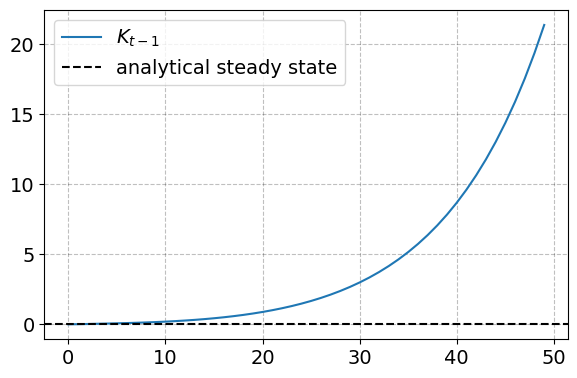

In [12]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.axhline(K_ss,ls='--',color='black',label='analytical steady state')
ax.legend(frameon=True)
fig.tight_layout()
K_lag_old = model.sim.K_lag.copy()

**Task:** Test if the starting point matters?

RUn again the full simulation, but with # par.K_lag_ini = 1.9*K_ss # before the start. Now the initial kapital accumulated is over the steady state level and we should expect it to decrease overtime

**Additional check:** Not much should change with only small parameter changes. 

In [13]:
# a. production (close to cobb-douglas)
par.production_function = 'ces'
par.theta = 0.001

# b. household (close to logarithmic)
par.sigma = 1.1

# c. goverment (weakly active)
par.tau_w = 0.001
par.tau_r = 0.001

# d. simulate
model.simulate()

simulation done in 0.02 secs


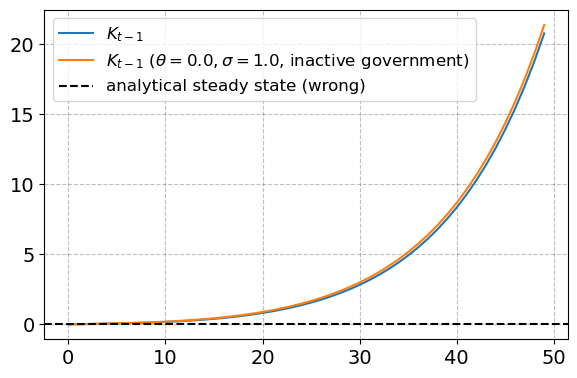

In [14]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.plot(K_lag_old,label=r'$K_{t-1}$ ($\theta = 0.0, \sigma = 1.0$, inactive government)')
ax.axhline(K_ss,ls='--',color='black',label='analytical steady state (wrong)')
ax.legend(frameon=True,fontsize=12)
fig.tight_layout()

## 2. <a id='toc2_'></a>[Active government](#toc0_)

In [15]:
model = OLGModelClass()
par = model.par
sim = model.sim

initializing the model:
calling .setup()
calling .allocate()


**Baseline:**

In [16]:
model.simulate()

simulation done in 0.02 secs


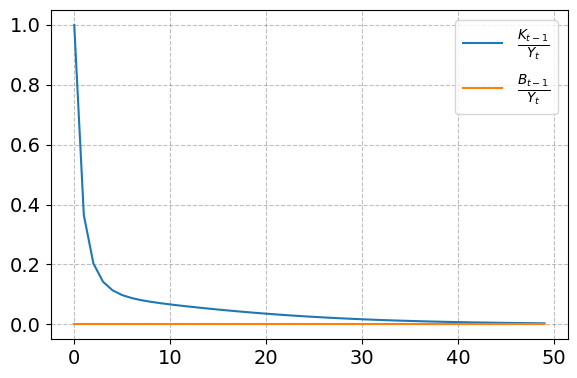

In [17]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(sim.K_lag/(sim.Y),label=r'$\frac{K_{t-1}}{Y_t}$')
ax.plot(sim.B_lag/(sim.Y),label=r'$\frac{B_{t-1}}{Y_t}$')
ax.legend(frameon=True)
fig.tight_layout()

**Remember steady state:**

In [18]:
K_ss = sim.K_lag[-1]
B_ss = sim.B_lag[-1]
G_ss = sim.G[-1]

**Spending spree of 5% in $T=3$ periods:**

In [19]:
# a. start from steady state
par.K_lag_ini = K_ss
par.B_lag_ini = B_ss

# b. spending spree
J = 0
dT = 3
sim.G[J:J+dT] = 1.05*G_ss
sim.balanced_budget[:J] = True #G adjusts
sim.balanced_budget[J:J+dT] = False # B adjusts
sim.balanced_budget[J+dT:] = True # G adjusts

**Simulate:**

In [20]:
model.simulate()

/Users/frederikke/Desktop/pro/projects-2023-frederikke_vigh/modelproject/Overall.py:190: RuntimeWarning: invalid value encountered in double_scalars
  sim.Y[t] = sim.A_lag[t] * sim.K_lag[t]**par.alpha * (sim.L_lag[t])**(1-par.alpha)
/Users/frederikke/Desktop/pro/projects-2023-frederikke_vigh/modelproject/Overall.py:193: RuntimeWarning: invalid value encountered in double_scalars
  sim.rk[t] = sim.A_lag[t] * par.alpha * sim.K_lag[t]**(par.alpha-1) * (sim.L_lag[t])**(1-par.alpha)
/Users/frederikke/Desktop/pro/projects-2023-frederikke_vigh/modelproject/Overall.py:194: RuntimeWarning: invalid value encountered in double_scalars
  sim.w[t] = sim.A_lag[t] * (1-par.alpha) * sim.K_lag[t]**(par.alpha) * (sim.L_lag[t])**(-par.alpha)


Exception: cannot find bracket for s

**Crowding-out of capital:**

In [ ]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(sim.K/(sim.Y),label=r'$\frac{K_{t-1}}{Y_t}$')
ax.plot(sim.B/(sim.Y),label=r'$\frac{B_{t-1}}{Y_t}$')
ax.legend(frameon=True)
fig.tight_layout()

**Question:** Would the households react today if the spending spree is say 10 periods in the future? 

No they would not, before the spending spree takes place, snce they are interested only by what happens in their own period of life.

## 3. <a id='toc3_'></a>[Potential analysis and extensions](#toc0_)

**Potential analysis:**

1. Over-accumulation of capital relative to golden rule?
2. Calibration to actual data
3. Generational inequality
4. Multiple equilibria

**Extensions:**

1. Add population and technology growth
2. More detailed tax and transfer system
3. Utility and productive effect of government consumption/investment
4. Endogenous labor supply
5. Bequest motive
6. Uncertain returns on capital
7. Additional assets (e.g. housing)
8. More than two periods in the life-cycle (life-cycle)
9. More than one dynasty (cross-sectional inequality dynamics)